# Canonical Correlation Analysis for Artificial Data

This notebook trains a canonical correlation analysis model with random Fourier features, and plot results.

<!--
<div align="center">
    <img src="figures/figure_cca_for_artificial_data.png" width="600" alt="CCA for artificial data" />
</div>
-->

In [1]:
import numpy as np
import sklearn.cross_decomposition
import matplotlib.pyplot as plt

# Import rfflearn.
import rfflearn.cpu as rfflearn

# If you want to enable GPU, please import rfflearn like the following instead.
#import rfflearn.gpu as rfflearn

## Prepare dataset

Generate the data pair, `x` and `y`.

The data `x = [x1, x2]` and `y = [y1, y2]` has a strong correlation, `y1 = x1**2`.
This means that it is theoretically possible to extract correlated subspace of this data.

In [2]:
n_samples = 100

xs1 = np.random.uniform(-1, 1, size = (n_samples,))
xs2 = np.random.randn(n_samples)
xs3 = np.random.randn(n_samples)

Xs = np.array([xs1,    xs2]).T
Ys = np.array([xs1**2, xs3]).T

## Cannonical correlation analysis

The following cell trains both linear CCA model and RFFCCA model.

In [3]:
# Fix seed for random fourier feature calclation
rfflearn.seed(111)

# Linear CCA
cca_lin = sklearn.cross_decomposition.CCA(n_components=1)
cca_lin.fit(Xs, Ys)
lin_z1, lin_z2 = cca_lin.transform(Xs, Ys)
score_lin = cca_lin.score(Xs, Ys)
print("Score of linear CCA:", score_lin)

# RFF CCA
cca_rff = rfflearn.RFFCCA(dim_kernel=128, std_kernel=0.1, n_components=1)
cca_rff.fit(Xs, Ys)
rff_z1, rff_z2 = cca_rff.transform(Xs, Ys)
score_rff = cca_rff.score(Xs, Ys)
print("Score of RFF CCA:", score_rff)


Score of linear CCA: -0.2930267162057537
Score of RFF CCA: 0.008070793013964857


## Plot results

Plot results of linear CCA and RFFCCA.
Linear CCA faield to find correlation of the data, because the conversion result of linear CCA looks like noise.
However, RFFCCA succeeded to find correlation.

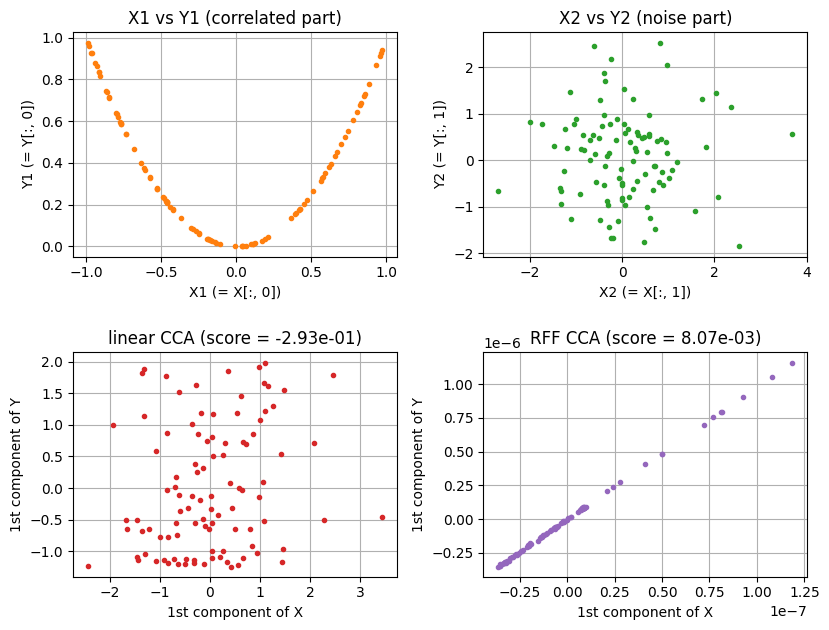

In [4]:
plt.figure(figsize = (8.4, 6.4))

plt.subplot(2, 2, 1)
plt.title("X1 vs Y1 (correlated part)")
plt.xlabel("X1 (= X[:, 0])")
plt.ylabel("Y1 (= Y[:, 0])")
plt.plot(Xs[:, 0], Ys[:, 0], '.', color = "C1")
plt.grid()

plt.subplot(2, 2, 2)
plt.title("X2 vs Y2 (noise part)")
plt.xlabel("X2 (= X[:, 1])")
plt.ylabel("Y2 (= Y[:, 1])")
plt.plot(Xs[:, 1], Ys[:, 1], '.', color = "C2")
plt.grid()

plt.subplot(2, 2, 3)
plt.title("linear CCA (score = %.2e)" % score_lin)
plt.xlabel("1st component of X")
plt.ylabel("1st component of Y")
plt.plot(lin_z1, lin_z2, '.', color = "C3")
plt.grid()

plt.subplot(2, 2, 4)
plt.title("RFF CCA (score = %.2e)" % score_rff)
plt.xlabel("1st component of X")
plt.ylabel("1st component of Y")
plt.plot(rff_z1, rff_z2, '.', color = "C4")
plt.grid()

plt.tight_layout()
plt.show()